Lab 2
R.V.M.Deekshith.M

In [12]:
import pandas as pd
import numpy as np

#loading the excel file
file_path = '/content/Purhase_data.csv'  # Updated to CSV file
df = pd.read_csv(file_path)  # Changed to read_csv for CSV files

#gives the first five rows of the excel so that it will be known data is loaded properly
print("loaded data:\n", df.head())

# selcting the candies,mangoes,milk packets columns for creating matrix A
matrix_A = df.iloc[:, 1:-1].values
#select the last column and convert to column vector
matrix_c= df.iloc[:, -1].values.reshape(-1, 1)
# dimensionality = no.of features in matrix_A
print("\ndimensionality of vector space:", matrix_A.shape[1])

# Number of vectors = number of rows
print("no.of vectors in vector space:", matrix_A.shape[0])

# Rank of matrix A
rank_A = np.linalg.matrix_rank(matrix_A)
print("Rank of matrix A:", rank_A)

# Computing pseudo-inverse and solve A.X = C
A_pinv = np.linalg.pinv(matrix_A)
X = A_pinv @ matrix_c
print(X)
# Displaying the results
product_names = ['candies (₹per unit)', 'mangoes (₹ per kg)', 'milk_packets (₹ per unit)']
print("\estimated cost of each product:")
for i in range(len(product_names)):
    print(f"{product_names[i]}: ₹{X[i][0]:.2f}")


loaded data:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280

dimensionality of vector space: 3
no.of vectors in vector space: 10
Rank of matrix A: 3
[[ 1.]
 [55.]
 [18.]]
\estimated cost of each product:
candies (₹per unit): ₹1.00
mangoes (₹ per kg): ₹55.00
milk_packets (₹ per unit): ₹18.00


#A2

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

#loading the csv file
df = pd.read_csv('/content/Purhase_data.csv')
#creating a label column as Rich(1) if payment >200 else considered as poor(0)
df['Label'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0)

# selecing features candies,mangoes,milkpackets
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Label']

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict class
df['Prediction'] = model.predict(X)
df['Class'] = df['Prediction'].apply(lambda x: 'RICH' if x == 1 else 'POOR')

# Print result
print(df[['Customer', 'Payment (Rs)', 'Class']])


  Customer  Payment (Rs) Class
0      C_1           386  RICH
1      C_2           289  RICH
2      C_3           393  RICH
3      C_4           110  POOR
4      C_5           280  RICH
5      C_6           167  POOR
6      C_7           271  RICH
7      C_8           274  RICH
8      C_9           148  POOR
9     C_10           198  POOR


Population Mean: 1560.66, Variance: 58732.37
Wednesday Mean: 1550.71
April Mean: 1698.95
Probability of Loss: 0.50
Probability of Profit on Wednesday: 0.08
conditional probability (Profit | Wednesday): 0.42


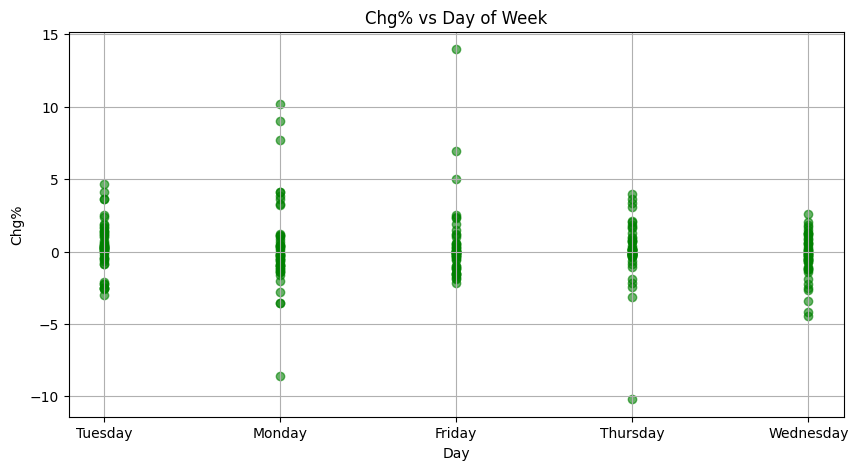

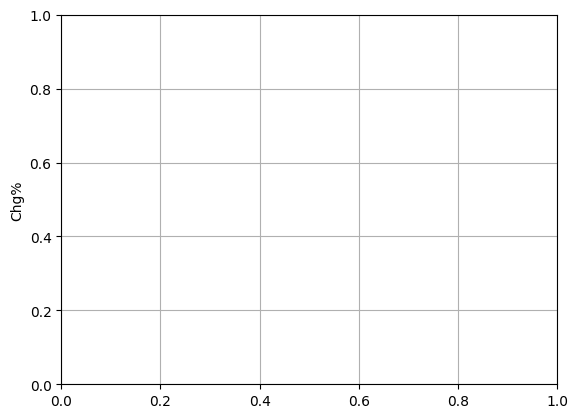

In [15]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

#loading the dataset
df = pd.read_csv('/content/IRCTC_stock_price.csv')

# Convert 'Date' column to datetime so that time-based operatins can be performed
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Day' of week column
df['Day'] = df['Date'].dt.day_name()

# Clean and convert 'Price' and 'Chg%' columns to numeric
df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3].astype(str).str.replace(',', '').str.strip(), errors='coerce')  # Price column
df['Chg%'] = pd.to_numeric(df['Chg%'].astype(str).str.replace('%', '').str.strip(), errors='coerce')  # Change % column

# it Drops rows with NaNs in these columns
df = df.dropna(subset=[df.columns[3], 'Chg%'])

#computing the  mean and variance of column D (Price)
prices = df.iloc[:, 3]
mean_price = statistics.mean(prices)
var_price = statistics.variance(prices)
print(f"Population Mean: {mean_price:.2f}, Variance: {var_price:.2f}")

#it filters rows with wednesdays and extracts their price values and computes the mean price on wednesdays
wednesday_prices = df[df['Day'] == 'Wednesday'].iloc[:, 3]
mean_wed = statistics.mean(wednesday_prices)
print(f"Wednesday Mean: {mean_wed:.2f}")

#it filters the rows where the month is april(4) using the datetime object
april_prices = df[df['Date'].dt.month == 4].iloc[:, 3]
mean_apr = statistics.mean(april_prices)
print(f"April Mean: {mean_apr:.2f}")

# probability of loss (Chg% < 0)
loss_probability = (df['Chg%'] < 0).mean()
print(f"Probability of Loss: {loss_probability:.2f}")

# Probability of profit on Wednesday
profit_wed_prob = ((df['Chg%'] > 0) & (df['Day'] == 'Wednesday')).mean()
print(f"Probability of Profit on Wednesday: {profit_wed_prob:.2f}")

#Conditional probability of profit given Wednesday
P_Profit_given_Wed = ((df['Chg%'] > 0) & (df['Day'] == 'Wednesday')).sum() / (df['Day'] == 'Wednesday').sum()
print(f"conditional probability (Profit | Wednesday): {P_Profit_given_Wed:.2f}")

#Scatter plot of Chg% vs day of week
plt.figure(figsize=(10, 5))
plt.scatter(df['Day'], df['Chg%'], color='green', alpha=0.6)
plt.title("Chg% vs Day of Week")
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()

plt.ylabel("Chg%")
plt.grid(True)
plt.show()


A4,A5,A6,A7,A8 and A9


A4: datatypes:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured

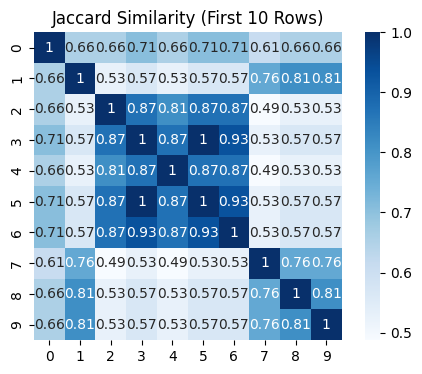

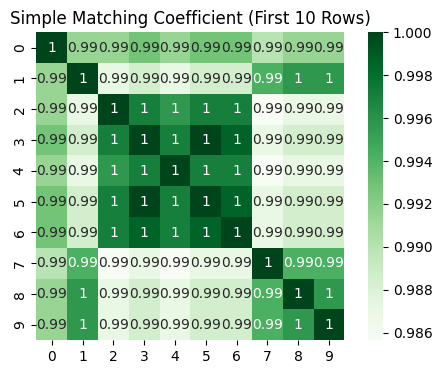

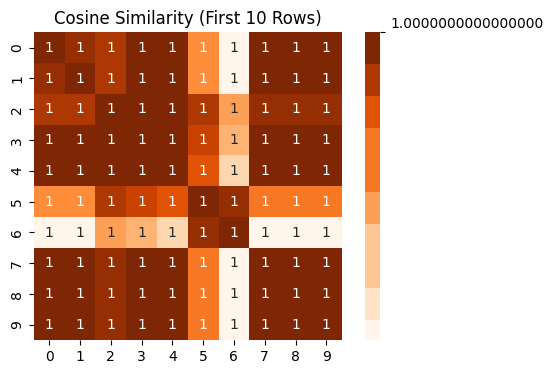

✅ A8: Imputed DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   int64  
 2   sex                        9172 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium                    9172 non-null   object 
 13  goitre             

/tmp/ipython-input-14-3624421144.py:135: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

# Function A4: Data Exploration
def exploring_dataset(data):
    #provides the column names and their data types
    data_info = data.dtypes

    # counts the number of missing (null) values in each column
    missing_values = data.isnull().sum()

    # displays count, mean, min, max, and quartiles for numeric columns
    descriptive_stats = data.describe()

    # identifies categorical columns (usually of object type, e.g., text or labels)
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

    # applies Label Encoding to convert categorical string labels into numeric form
    label_encoded = data.copy()
    encoder = LabelEncoder()
    for col in categorical_columns:
        label_encoded[col] = encoder.fit_transform(label_encoded[col].astype(str))

    # performs One-Hot Encoding — converts categorical columns into binary (0/1) format
    onehot_encoded = pd.get_dummies(data, columns=categorical_columns)

    # extracts only numeric columns for statistical analysis and outlier detection
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

    # computes the mean and standard deviation for each numeric column
    mean_std = {col: (data[col].mean(), data[col].std()) for col in numeric_cols}

    # returns a dictionary of all processed components
    return {
        "data_info": data_info,
        "missing_values": missing_values,
        "descriptive_stats": descriptive_stats,
        "categorical_columns": categorical_columns,
        "label_encoded_data": label_encoded,
        "onehot_encoded_data": onehot_encoded,
        "numeric_columns": numeric_cols,
        "mean_std_dict": mean_std
    }

# Function A5: binary similarity metrics - Jaccard Coefficient and Simple Matching Coefficient (SMC)
def compute_the_binary_similarity(data, row1, row2):
    # extracts two specific rows for similarity comparison
    v1 = data.iloc[row1].astype(int)
    v2 = data.iloc[row2].astype(int)

    # calculates binary matching conditions:
    # f11 for both values are 1
    # f00: for both values are 0
    # f10:for  1 in row1 and 0 in row2
    # f01: for 0 in row1 and 1 in row2

    f11 = ((v1 == 1) & (v2 == 1)).sum()
    f00 = ((v1 == 0) & (v2 == 0)).sum()
    f10 = ((v1 == 1) & (v2 == 0)).sum()
    f01 = ((v1 == 0) & (v2 == 1)).sum()

    # calculating the Jaccard Coefficient:
    # JC = f11 / (f11 + f10 + f01)
    jaccard = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0

    # calculating the Simple Matching Coefficient (SMC):
    #     SMC = (f11 + f00) / total attributes
    smc = (f11 + f00) / (f11 + f00 + f10 + f01)

    # 5. returns a dictionary of counts and similarity scores
    return {
        "f11": f11,
        "f00": f00,
        "f10": f10,
        "f01": f01,
        "jaccard": jaccard,
        "smc": smc
    }

# A6: Cosine Similarity
#row1 index of the first row(int)
#row2 is index of the second row (int)
def compute_cosine_similarity(data, row1, row2):
  #to get the entire row at index row1 with vec1 and for row2 with vec2 and get the series in numpy array and converting 1D array into 2D array with 1 row and n columns
    vec1 = data.iloc[row1].values.reshape(1, -1)
    vec2 = data.iloc[row2].values.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

# A7: Plot Heatmaps of JC, SMC, Cosine
def plot_similarity_heatmaps(data, num_rows=10):
  #intializing three empty square matrics,so that later will store the pairwise similarity values
    jc_matrix = np.zeros((num_rows, num_rows))
    smc_matrix = np.zeros((num_rows, num_rows))
    cos_matrix = np.zeros((num_rows, num_rows))
#for computing all pairwise comparisions
    for i in range(num_rows):
        for j in range(num_rows):
  #diagonal entries are set to 1 because similarity of any item with itself is maximum (1)
            if i == j:
                jc_matrix[i][j] = smc_matrix[i][j] = cos_matrix[i][j] = 1.0
            else:
            #to calculate jaccard and SMC similarity for binary data
                binary_sim = compute_the_binary_similarity(data, i, j)
                jc_matrix[i][j] = binary_sim["jaccard"]
                smc_matrix[i][j] = binary_sim["smc"]
                #calculating cosine similarity between rows i and j and stores it in the cosine matrix
                cos_matrix[i][j] = compute_cosine_similarity(data, i, j)

    plt.figure(figsize=(6, 4))
    sns.heatmap(jc_matrix, annot=True, cmap="Blues", square=True)
    plt.title("Jaccard Similarity (First 10 Rows)")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(smc_matrix, annot=True, cmap="Greens", square=True)
    plt.title("Simple Matching Coefficient (First 10 Rows)")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cos_matrix, annot=True, cmap="Oranges", square=True)
    plt.title("Cosine Similarity (First 10 Rows)")
    plt.show()

# A8: Impute missing values
def impute_missing_values(data):
    df_clean = data.replace('?', np.nan).copy()

    # Convert columns to numeric where possible
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')

    # Impute numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            skewness = df_clean[col].dropna().skew()
            strategy = 'mean' if abs(skewness) < 1 else 'median'
            imputer = SimpleImputer(strategy=strategy)
            df_clean[[col]] = imputer.fit_transform(df_clean[[col]])

    # Impute categorical columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            imputer = SimpleImputer(strategy='most_frequent')
            df_clean[[col]] = imputer.fit_transform(df_clean[[col]])

    return df_clean

# A9: Normalize data
def normalize_data(data, method='minmax'):
    df_norm = data.copy()
    numeric_cols = df_norm.select_dtypes(include=[np.number]).columns

    scaler = MinMaxScaler() if method == 'minmax' else StandardScaler()
    df_norm[numeric_cols] = scaler.fit_transform(df_norm[numeric_cols])

    return df_norm



# MAIN PROGRAM
df = pd.read_csv("/content/thyroid0387.csv")
exploration = exploring_dataset(df)

# A4 outputs
print("A4: datatypes:\n", exploration["data_info"])
print("\nmissing values:\n", exploration["missing_values"])
print("\nDescriptive statistics:\n", exploration["descriptive_stats"])
print("\nCategorical Columns:", exploration["categorical_columns"])
print("\nMean & Std Dev for Numeric Columns:")
for col, (mean, std) in exploration["mean_std_dict"].items():
    print(f"{col}: Mean = {mean:.2f}, Std = {std:.2f}")

# A5: similarity between row 0 and 1
binary_data = exploration["onehot_encoded_data"]

similarity = compute_the_binary_similarity(binary_data, 0, 1)
print("\nA5: Binary Match Counts and Similarity Scores:")
print(similarity)

# A6: cosine similarity
cos_sim = compute_cosine_similarity(exploration["onehot_encoded_data"], 0, 1)
print(f"\nA6: Cosine Similarity (Row 0 vs 1): {cos_sim:.4f}")

# A7: heatmaps
print("\nA7: Heatmaps of Similarities (First 10 Rows):")
plot_similarity_heatmaps(exploration["onehot_encoded_data"], num_rows=10)

#A8 data Imputation
df_imputed = impute_missing_values(df)

print("✅ A8: Imputed DataFrame Info")
print(df_imputed.info())
print("\n A few rows after imputation:")
print(df_imputed.head())

# A9: normalization
df_minmax = normalize_data(df_imputed, method='minmax')
df_zscore = normalize_data(df_imputed, method='zscore')

print("\n A9: MinMax normalized DataFrame (first 5 rows):")
print(df_minmax.head())

print("\n A9: Z-score normalized DataFrame (first 5 rows):")
print(df_zscore.head())
